# Task 2: Signal Processing I {-}
**Name: ** Raymond Ren  
**Degree: ** Bachelors  
**ID: ** 20667930

In [2]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

## Problem 1: Sampling {-}

**(a) What is the difference between continuous (or analogue) and discrete (or digital) signals?**  
Analog signals are continuous signals which vary with time and have an infinite set of possible values. On the other hand, digital signals are discrete and have a finite set of possible values.  

**(b) Plot a 10 Hz cosine wave with a high sampling rate (nearly analog signal). Please connect the sampled points and plot only four cycles of the wave.**

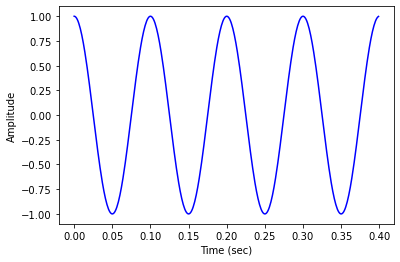

In [31]:
x = np.arange(0, 0.4, 1/1000)
y = np.cos(2*np.pi*10*x)

plt.plot(x,y, 'b-')
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.show()

**(c) Plot the 10 Hz cosine wave after sampling with 40 Hz. Please plot the sampled data for four cycles of the wave (do not connect the sampled points).**

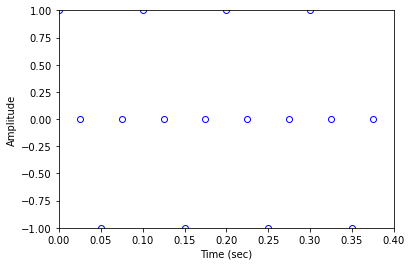

In [4]:
x = np.arange(0, 0.4, 1/40)
y = np.cos(2*np.pi*10*x)

plt.plot(x,y, 'bo', markerfacecolor='None')
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.4)
plt.ylim(-1, 1)
plt.show()

**(d) Plot the 10 Hz cosine wave after sampling with 15 Hz. Please plot only four cycles of the wave (connect the sampled points). Do you think that you can get a true frequency of the wave after sampling?**

You cannot get the true frequency of the wave after sampling because aliasing occurs due to the low sampling rate. With a sampling rate of 15 Hz, the Nyquist frequency is at 7.5 Hz. The true frequency at 10 Hz is larger than the Nyquist frequency, so aliasing occurs.

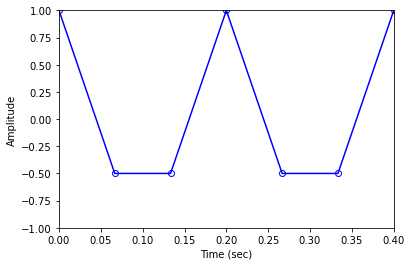

In [25]:
x = np.arange(0, 0.5, 1/15)
y = np.cos(2*np.pi*10*x)

plt.plot(x,y, 'bo-', markerfacecolor='None')
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.4)
plt.ylim(-1, 1)
plt.show()

**(e) Do you think that you can measure the frequency of the sampled wave in (d) if you add a phase angle to the original wave? For example, the original wave is cos(2πft + φ). Explain your answer.**  
Adding a phase angle to the original wave in (d) shifts the wave in the x-direction and doesn't change the true frequency of the original wave. Therefore, aliasing still occurs in (d) and the true frequency of the wave is lost. However, the frequency of the sampled wave can be obtained using the folding diagram. With the true frequency equals to 1.33 times the Nyquist frequency, we find that the alias frequency is 5 Hz.

**(f) Do you think that you can measure the frequency of the sampled wave in (d) if you add a dc signal to the original wave? For example, the original wave is cos(2πft) + d. Explain your answer.**  
Adding a DC signal to the original wave in (d) shifts the wave in the y-direction and doesn't change the true frequency of the original wave.. Therefore, aliasing still occurs in (d) and the true frequency of the wave is lost. However, the frequency of the sampled wave can be obtained using the folding diagram. With the true frequency equals to 1.33 times the Nyquist frequency, we find that the alias frequency is 5 Hz.

**(g) What sampling rate do we use to measure the 10 Hz cosine wave?**  
A sampling rate of at least 20 Hz should be used to measure the 10 Hz cosine wave to ensure that aliasing does not occur.

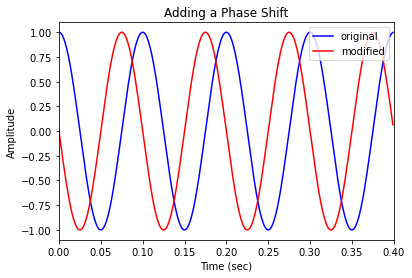

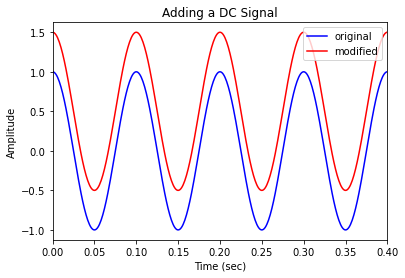

In [40]:
x = np.arange(0, 0.4, 1/1000)
y = np.cos(2*np.pi*10*x)
y1 = np.cos(2*np.pi*10*x + np.pi/2)
y2 = np.cos(2*np.pi*10*x) + 0.5

plt.plot(x,y, 'b-')
plt.plot(x,y1, 'r-')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim([0,0.4])
plt.title('Adding a Phase Shift')
plt.legend(['original', 'modified'], loc='upper right')
plt.show()

plt.plot(x,y, 'b-')
plt.plot(x,y2, 'r-')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim([0,0.4])
plt.title('Adding a DC Signal')
plt.legend(['original', 'modified'], loc='upper right')
plt.show()

## Problem 2: Aliasing {-}  
**(a) A 8 Hz sine wave is sampled at 10 Hz. Compute the alias frequency that results from the sampling of the original wave. Plot 12 cycles of the original wave, and overlay the sampled points and connect the points (with a different colour). Please confirm that the sampled signal appears as oscillating with the alias frequency that you found.**  

With a sampling rate of 10 Hz, the Nyquist frequency is 10/2 = 5 Hz. The true frequency of the sine wave is 8 Hz, which is larger than the Nyquist frequency, so aliasing will occur. Using the folding diagram, 8/5 = 1.6 which correlates to a alias frequency of 2 Hz or 0.4 times the Nyquist frequency. This is consistent with the sampled signal plotted in the following figure, as it oscillates three times within 1.5 seconds which is a frequency of 2 Hz. 

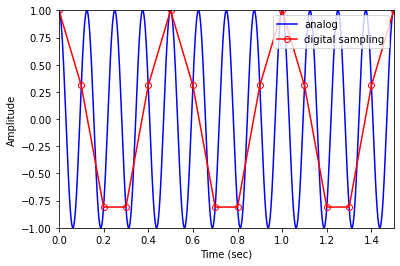

In [6]:
x_analog = np.arange(0, 1.5, 1/1000)
y_analog = np.cos(2*np.pi*8*x_analog)
x_sample = np.arange(0, 2, 1/10)
y_sample = np.cos(2*np.pi*8*x_sample)

plt.plot(x_analog, y_analog, 'b-')
plt.plot(x_sample, y_sample, 'ro-', markerfacecolor='None')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 1.5), plt.ylim(-1, 1)
plt.legend(['analog', 'digital sampling'], loc='upper right')
plt.show()

**(b) A 8 Hz sine wave is sampled at 24 Hz. Compute the alias frequency that results from the sampling of the original wave. Plot 12 cycles of the original wave, and overlay the sampled points and connect the points (with a different colour). Please confirm that the sampled signal appears as oscillating with the alias frequency that you found.**  

With a sampling rate of 24 Hz, the Nyquist frequency is 24/2 = 12 Hz. The true frequency of the sine wave is 8 Hz, which is smaller than the Nyquist frequency, so no aliasing will occur. Therefore, the frequency of the sampled wave is equal to that of that original frequency. This is confirmed by looking at the graph below, where both signals oscillate at the same frequency. 

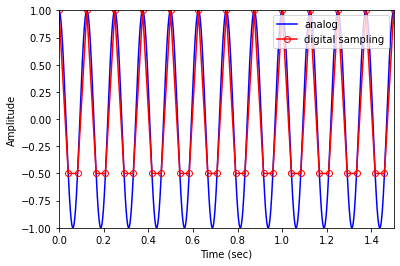

In [7]:
x_analog = np.arange(0, 1.5, 1/1000)
y_analog = np.cos(2*np.pi*8*x_analog)
x_sample = np.arange(0, 2, 1/24)
y_sample = np.cos(2*np.pi*8*x_sample)

plt.plot(x_analog, y_analog, 'b-')
plt.plot(x_sample, y_sample, 'ro-', markerfacecolor='None')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 1.5), plt.ylim(-1, 1)
plt.legend(['analog', 'digital sampling'], loc='upper right')
plt.show()

**(c) Assume that the measured signal has a combination of three periodic signals: **  
$$ y(t) = A1cos2\pi(15)t + A2cos2\pi(45)t + A3cos2\pi(75)t $$  
**If the signal is sampled at 120 Hz, determine the frequency content of the sampled signal.**  

This measured signal has a frequency of 15 Hz. Since this is less than half of the sampling frequency, no aliasing will occur. The frequency of the sampled wave is therefore equal to that of the original signal.



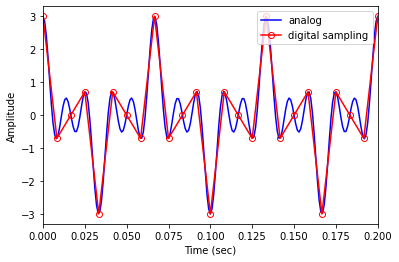

In [8]:
x_analog = np.arange(0, 1, 1/1000)
y_analog = np.cos(2*np.pi*15*x_analog) + np.cos(2*np.pi*45*x_analog) + np.cos(2*np.pi*75*x_analog)
x_sample = np.arange(0, 1, 1/120)
y_sample = np.cos(2*np.pi*15*x_sample) + np.cos(2*np.pi*45*x_sample) + np.cos(2*np.pi*75*x_sample)

plt.plot(x_analog, y_analog, 'b-')
plt.plot(x_sample, y_sample, 'ro-', markerfacecolor='None')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 0.2)
plt.legend(['analog', 'digital sampling'], loc='upper right')
plt.show()

**(d) Assume that the measured signal has a combination of three periodic signals: **  
$$ y(t) = A1cos2\pi(15)t + A2cos2\pi(45)t + A3cos2\pi(75)t $$  
**If the signal is sampled at 160 Hz, determine the frequency content of the sampled signal.**  

This measured signal has a frequency of 15 Hz. Since this is less than half of the sampling frequency, no aliasing will occur. The frequency of the sampled wave is therefore equal to that of the original signal.



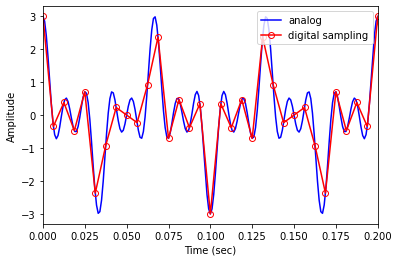

In [9]:
x_analog = np.arange(0, 1, 1/1000)
y_analog = np.cos(2*np.pi*15*x_analog) + np.cos(2*np.pi*45*x_analog) + np.cos(2*np.pi*75*x_analog)
x_sample = np.arange(0, 1, 1/160)
y_sample = np.cos(2*np.pi*15*x_sample) + np.cos(2*np.pi*45*x_sample) + np.cos(2*np.pi*75*x_sample)

plt.plot(x_analog, y_analog, 'b-')
plt.plot(x_sample, y_sample, 'ro-', markerfacecolor='None')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 0.2)
plt.legend(['analog', 'digital sampling'], loc='upper right')
plt.show()

## Problem 3: Issues in Sampling {-}  
**(a) Please explain aliasing. When do they occur? How to avoid them?.**  
Aliasing refers to the distortion of signals when samples, causing the sampled signal to misrepresent the frequency of the original signal. This effect occurs when the original signal is undersampled, specifically when the signal frequency is less than the Nyquist frequency. To avoid aliasing, the sampling rate must be at least twice as large as the frequency of the original signal. Anti-aliasing filters can also be applied before sampling to remove frequencies higher than the Nyquist frequency.

**(b) Please explain quantization errors. When do they occur? How to avoid them?**  
Quantization refers to the process in which intervals of continuous, infinte data are mapped to a smaller, discrete set of bins. Quantization errors refer to the difference in value between the original input and the resulting output. In signal processing, these errors occur when converting from analog to digital signals. It is not possible to completely avoid quantization errors during this process, but it is possible to minimize the error by either using a larger sampling rate or using a larger bit depth.  

**(c) Please explain clipping errors. When do they occur? How to avoid them?**  
Clipping is a type of signal distortion where the signal is somehow restricted to a certain range, causing amplitudes outside of the range to be 'clipped'. These errors can occur when a sensor is constrained to measuring a certain range of data. Clipping can be avoided by using limiters to reduce the amplitude of a signal.  

**(d) Please explain oversampling issues. When do they occur? What are the consequence of the oversampling?**  
Oversampling refers to the use of an excessively high sampling rate. While larger sampling rates reduces the amount of error in the resulting signal, oversampling can lead to large file sizes and slow computation times for very marginal benefits.  

**(e) Assume that a building vibrates with a 5 Hz sine wave:**  
$$ y(t) = cos(2\pi f_{0}t),  f_{0}=8 $$  
**and you measured this vibration using your accelerometer and DAQ system. Please write a code to create three different sampled signals that are damaged by (1) aliasing, (2) quantization error, and (3) clipping error, respectively. Also, generate a signal having an oversampling issue. You should understand the topics of Aliasing, Quantization, Clipping, and Oversampling in data_aquisition_W21_v1.mlx to solve this problem. You need to explain why your sampled signals contain each of these errors/issues. You can assume any sampling rate, output range, or ADC resolution to generate these signals. Your code should plot these four signals.**  
  
**(1) Aliasing:**  
In the following example, a sampling rate of of 10 Hz is used. Since the signal frequency (8 Hz) is greater than the Nyquist frequency (10/2 = 5 Hz), aliasing occurs. Using the folding diagram, with the signal frequency equals to 1.6 times the Nyquist frequency, we find that the alias frequency is equal to 2 Hz (0.4 times the Nyquist frequency). This is confirmed by analyzing the sampled signal in the following plot.

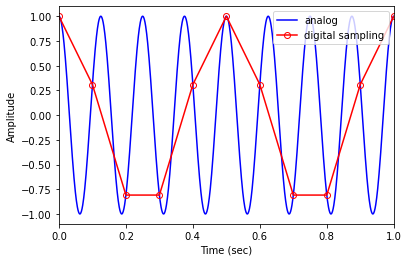

In [10]:
## aliasing
x_analog = np.arange(0, 10, 1/1000)
y_analog = np.cos(2*np.pi*8*x_analog)
x_sample = np.arange(0, 10, 1/10)
y_sample = np.cos(2*np.pi*8*x_sample)

plt.plot(x_analog, y_analog, 'b-')
plt.plot(x_sample, y_sample, 'ro-', markerfacecolor='None')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 1)
plt.legend(['analog', 'digital sampling'], loc='upper right')
plt.show()

**(2) Quantization Error:**  
In this example, it is assumed that the ADC can only store integer values. Therefore, when the analog signal is sampled, those data points are mapped to either -1, 0, or 1. The quantization errors are clearly visualized as the gaps between the analog and digital signals. 


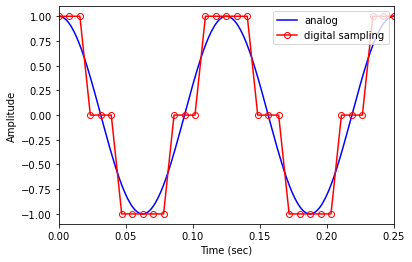

In [11]:
## quantization
x_analog = np.arange(0, 10, 1/1000)
y_analog = np.cos(2*np.pi*8*x_analog)
x_sample = np.arange(0, 10, 1/128)
y_sample = np.cos(2*np.pi*8*x_sample)
y_sample = np.round(y_sample) #round to nearest int

plt.plot(x_analog, y_analog, 'b-')
plt.plot(x_sample, y_sample, 'ro-', markerfacecolor='None')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 0.25)
plt.legend(['analog', 'digital sampling'], loc='upper right')
plt.show()

**(3) Clipping Error: **
This example assumes that the accelorometer used to measure this signal was constrained to amplitudes between -0.75 and 0.75. Since the range of the vibration frequency is from -1 to 1, values outside of the accelorometer threshold are clipped.

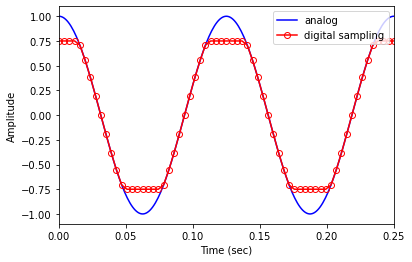

In [12]:
## clipping
x_analog = np.arange(0, 10, 1/1000)
y_analog = np.cos(2*np.pi*8*x_analog)
x_sample = np.arange(0, 10, 1/256)
y_sample = np.cos(2*np.pi*8*x_sample)

#clip values outside of [-0.75, 0.75] range
y_sample[y_sample > 0.75] = 0.75
y_sample[y_sample < -0.75] = -0.75

plt.plot(x_analog, y_analog, 'b-')
plt.plot(x_sample, y_sample, 'ro-', markerfacecolor='None')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 0.25)
plt.legend(['analog', 'digital sampling'], loc='upper right')
plt.show()

**(4) Oversampling: **  
A sampling rate of 10000 Hz is used in this example. This is excessive because the signal frequency is only 8 Hz.

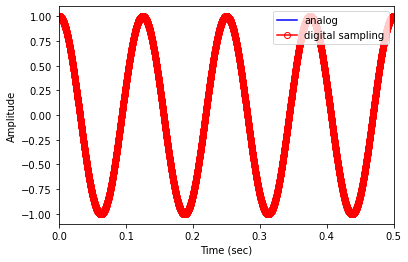

In [13]:
## oversampling
x_analog = np.arange(0, 10, 1/1000)
y_analog = np.cos(2*np.pi*8*x_analog)
x_sample = np.arange(0, 10, 1/10000)
y_sample = np.cos(2*np.pi*8*x_sample)


plt.plot(x_analog, y_analog, 'b-')
plt.plot(x_sample, y_sample, 'ro-', markerfacecolor='None')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 0.5)
plt.legend(['analog', 'digital sampling'], loc='upper right')
plt.show()

## Problem 4: Fourier Series 1 (10 points) {-}  
**(a) Plot a wave1. The wave1 is:**
$$ y(t) = cos(2\pi f_{0}t) \cdot cos(2\pi f_{0}t) $$  
**where f0 = 15. Please connect sampled points and plot only ten cycles of the wave (You can choose any sampling rate).**

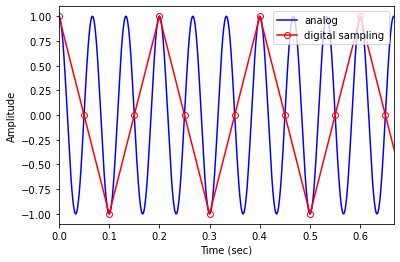

In [14]:
x_analog = np.arange(0, 10, 1/1000)
y_analog = np.cos(2*np.pi*15*x_analog)
x_sample = np.arange(0, 10, 1/20)
y_sample = np.cos(2*np.pi*15*x_sample)


plt.plot(x_analog, y_analog, 'b-')
plt.plot(x_sample, y_sample, 'ro-', markerfacecolor='None')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 2/3)
plt.legend(['analog', 'digital sampling'], loc='upper right')
plt.show()

**(b) Derive a Fourier series (general form) of analytic wave1. You should find an analytic equation for coefficients of a0, an, and bn.**  
Using the following trigonometric identity, 
$$ cos^{2}(x) = \frac{1+cos(2x)}{2} $$  
we can transform our signal into the following form:
$$ y(t) = cos^{2}(2\pi f_{0}t) = \frac{1+cos(4\pi f_{0}t)}{2} = \frac{1}{2} + \frac{cos(2\pi (2f_{0})t)}{2}$$ 
This equation resembles the general form of the Fourier series:
$$ y(t) = \frac{a_{0}}{2} + \sum_{n=1}^{\infty} a_{n}cos(\frac{2\pi nt}{T_{p}}) + b_{n}sin(\frac{2\pi nt}{T_{p}})$$ 
where $$ T_{p} = \frac{1}{f} $$ 
Comparing the wave1 signal with the Fourier series general form, we can conclude that:  
$$ a_{0} = 1 $$
$$ a_{n} = 1/2, \rightarrow n = 2 $$
$$ a_{n} = 0, \rightarrow n \neq 2 $$
$$ b_{n} = 0 $$  
  
  
    
**(c) Derive a Fourier series (complex form) of analytic wave1. You should find an analytic equation for a coefficient of $c_{n}$.**  
Using Euler's formula,
$$ cos(x) = \frac{1}{2} (e^{ix}+e^{-ix}) $$
we convert our wave1 equation into the following form:
$$ y(t) = (\frac{1}{2} (e^{i2\pi f_{0}t}+e^{-i2\pi f_{0}t}))^{2} = \frac{1}{4}e^{4i\pi f_{0}t} + \frac{1}{2} + \frac{1}{4}e^{-4i\pi f_{0}t}$$
The complex form of the Fourier series is: 
$$ y(t) = \sum_{n = -\infty}^{\infty} c_{n}e^{i2\pi nft}$$
Comparing the wave1 signal with the Fourier series complex form, we can conclude that:  
$$ C_{n} = 1/2, \rightarrow n = 0 $$
$$ C_{n} = 1/4, \rightarrow n = \pm 2 $$
$$ C_{n} = 0, \rightarrow n \neq 0, \pm 2 $$

**(d) Derive a Fourier series (general form) of analytic wave2:**
$$ y(t) = cos(2\pi f_{0}t) \cdot cos(2\pi f_{0}t) + 5 $$  
**You should find analytic equations for coefficients of a0, an, and bn.**  

Using the following trigonometric identity, 
$$ cos^{2}(x) = \frac{1+cos(2x)}{2} $$  
we can transform our signal into the following form:
$$ y(t) = cos^{2}(2\pi f_{0}t) + 5 = \frac{1}{2} + \frac{cos(2\pi (2f_{0})t)}{2} + 5 $$ 
This equation resembles the general form of the Fourier series:
$$ y(t) = \frac{a_{0}}{2} + \sum_{n=1}^{\infty} a_{n}cos(\frac{2\pi nt}{T_{p}}) + b_{n}sin(\frac{2\pi nt}{T_{p}})$$ 
where $$ T_{p} = \frac{1}{f} $$ 
Comparing the wave1 signal with the Fourier series general form, we can conclude that:  
$$ a_{0} = 11 $$
$$ a_{n} = 1/2, \rightarrow n = 2 $$
$$ a_{n} = 0, \rightarrow n \neq 2 $$
$$ b_{n} = 0 $$  

**(e) Please compare the results of (b) and (d) and explain their difference.**  
The results of (b) and (d) are very similar, as both Fourier equations have the same $a_{n}$ and $b_{n}$ coefficients. The $\frac{a_{0}}{2}$ terms are different though, as $\frac{a_{0}}{2}$ is equal to 1.5 in (b) and 5.5 in (d). This is due to the translation of the signal in (d) by 5 units which remains when the original wave2 equation is represented as a Fourier series. 


## Problem 5: Fourier Series 2 (20 points) {-}
**(a) Plot only ten cycles of a reverse sawtooth wave:**
$$ x(t) = -t + floor(t) $$



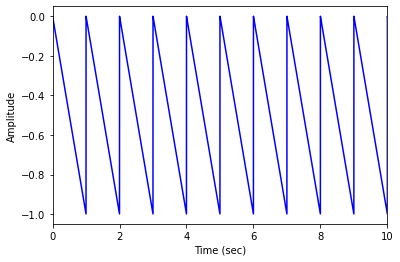

In [15]:
t = np.arange(0, 15, 1/1000)
x = -1*t + np.floor(t)

plt.plot(t, x, 'b-')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 10)
plt.show()

**(b) Derive a Fourier series (general form) for a reverse sawtooth wave:**
$$ x(t) = -t + floor(t) $$
**Please check the wikipedia link. You should find an analytic equation for coefficients of a0, an, and bn.**  

We know that $T_{p} = 1$. Therefore,  
$$ \frac{a_{0}}{2} = 1\int_{-1/2}^{1/2} x(t)dt = \frac{-1*1}{2} = \frac{-1}{2} $$
$$ a_{n} = 2\int_{-1/2}^{1/2} x(t)cos(2\pi nt)dt = 2\int_{0}^{1} -tcos(2\pi nt)dt = 2(\frac{-t}{2\pi n}sin(2\pi nt) - \frac{1}{(2\pi n)^2}cos(2\pi nt))\big|_0^1$$
$$ = -2(\frac{1}{(2\pi n)^2} - \frac{1}{(2\pi n)^2}) = 0$$

$$ b_{n} =  2\int_{-1/2}^{1/2} x(t)sin(2\pi nt)dt = 2\int_{0}^{1} -tsin(2\pi nt)dt = 2(\frac{t}{2\pi n}cos(2\pi nt) - \frac{1}{(2\pi n)^2}sin(2\pi nt))\big|_0^1 $$
$$ = 2(\frac{1}{2\pi n}cos(2\pi n) - 0) = 2(\frac{1}{2\pi n}*1) = \frac{1}{\pi n} $$


**Putting it all together, we have:**
$$ x(t) = \frac{-1}{2} + \sum_{n=1}^{\infty}\frac{1}{\pi n}sin(2\pi nt)$$  

**(c) Derive a Fourier series (complex form) for the same reverse sawtooth wave. You should find an analytic equation for a coefficient of $c_{n}$.**
$$ c_{n} = \int_{0}^{1}-te^{-2\pi int}dt = (\frac{t}{2\pi in}e^{-2\pi int} + \frac{1}{(2\pi in)^2}e^{-2\pi int})\big|_0^1 = \frac{t(2\pi in) + 1}{(2\pi in)^2}e^{-2\pi int}\big|_0^1 $$
$$ = \frac{(2\pi in) + 1}{(2\pi in)^2}e^{-2\pi in} - \frac{1}{(2\pi in)^2}$$

Using Euler's formula to simplify the $e^{-2\pi in}$ term:
$$e^{i\theta} = cos(\theta) - isin(\theta) \rightarrow e^{-2\pi in} = cos(-2\pi n) - isin(-2\pi n) = 1$$

Subsituting that into the above equation:
$$ c_{n} = \frac{(2\pi in) + 1}{(2\pi in)^2}(1) - \frac{1}{(2\pi in)^2}  = \frac{2\pi in}{(2\pi in)^2} = \frac{1}{2\pi in}, \rightarrow n \neq 0$$  

This equation is undefined when n=0, but we know that $c_{0} = \frac{a_{n}}{2}$, so:
$$ c_{n} = -1/2 \rightarrow n=0 $$
$$ c_{n} = \frac{1}{2\pi in} \rightarrow n \neq 0 $$  
  
**(d) Write a code to create and plot approximated sawtooth waves (# of coefficients (n) = 8) using the derived Fourier series in the general and complex forms. You should compare the waves from the general and complex forms.**


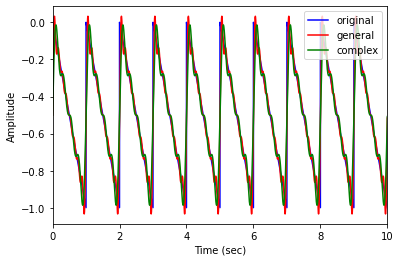

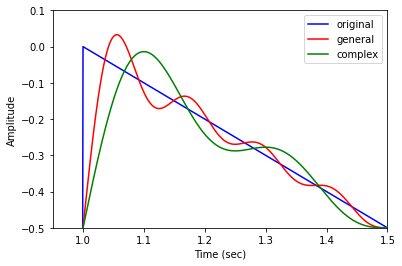

In [16]:
n_coeff = 8
t = np.arange(0,10, 1/1000)

#original
x = -t + np.floor(t)

#general form
x_gen = -1/2 #a0 term
for n in range(1, n_coeff+1): #add a1 to a8
    x_gen += 1/(np.pi*n) * np.sin(2*np.pi*n*t)

#complex form
x_com = 0
for n in range(int(-1*n_coeff/2), int(n_coeff/2)+1): #add c-4 to c4
    if n == 0:
        x_com += -1/2 * np.exp(2*1j*np.pi*n*t)
    else:
        x_com += 1/(2*np.pi*1j*n) * np.exp(2*1j*np.pi*n*t)

#plot
plt.plot(t, x, 'b-')
plt.plot(t, x_gen, 'r-')
plt.plot(t, x_com, 'g-')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 10)
plt.legend(['original', 'general', 'complex'], loc='upper right')
plt.show()

#zoomed in plot
plt.plot(t, x, 'b-')
plt.plot(t, x_gen, 'r-')
plt.plot(t, x_com, 'g-')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0.95, 1.5), plt.ylim(-0.5, 0.1)
plt.legend(['original', 'general', 'complex'], loc='upper right')
plt.show()


Both the general form and complex form Fourier series closely resemble the original reverse sawtooth wave. However, there is some disrepacies between the signals near the peaks of the sawtooth wave, presumably because that sort of angle is difficult to replicate with just 8 'n' coefficients.  

**(e) Write a code to find numerical Fourier coefficients in the general and complex forms and compare them with the analytic Fourier coefficients found in (b) and (c).**

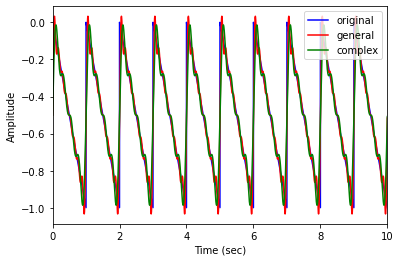

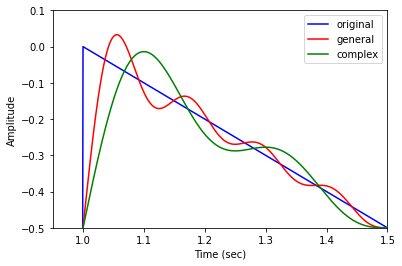

In [17]:
n_coeff = 8

#general form coefficients (a[0] = a1, a[1] = a2, etc.)
a = np.zeros(n_coeff)
b = np.zeros(n_coeff)
a0 = 2*quad(lambda t: -t, 0, 1)[0]
for n in range(1,n_coeff+1):
    a[n-1] = 2*quad(lambda t: -t*np.cos(2*np.pi*n*t), 0, 1)[0]
    b[n-1] = 2*quad(lambda t: -t*np.sin(2*np.pi*n*t), 0, 1)[0]

#complex form coefficients
#need to evaluate the real and imaginary compenents separately as quad only accepts real numbers
c_real = np.zeros(n_coeff + 1) #where c[0] = c_-4, c[1] = c_-3, etc.
c_imag = np.zeros(n_coeff + 1)
for i in range(n_coeff + 1):
    n = i - int(n_coeff/2)
    c_real[i] = quad(lambda t: np.real(-t*np.exp(-2*1j*np.pi*n*t)), 0, 1)[0]
    c_imag[i] = quad(lambda t: np.imag(-t*np.exp(-2*1j*np.pi*n*t)), 0, 1)[0]
c = c_real + 1j*c_imag

#plotting
t = np.arange(0,10, 1/1000)

#original
x = -t + np.floor(t)

#general form
x_gen = a0/2 #a0 term
for n in range(1, n_coeff+1): #add a1 to a8
    x_gen += a[n-1] * np.cos(2*np.pi*n*t) + b[n-1] * np.sin(2*np.pi*n*t)

#complex form
x_com = 0
for n in range(int(-1*n_coeff/2), int(n_coeff/2)+1): #add c-4 to c4
    x_com += c[n+4] * np.exp(2*1j*np.pi*n*t)

#plot
plt.plot(t, x, 'b-')
plt.plot(t, x_gen, 'r-')
plt.plot(t, x_com, 'g-')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0, 10)
plt.legend(['original', 'general', 'complex'], loc='upper right')
plt.show()

#zoomed in plot
plt.plot(t, x, 'b-')
plt.plot(t, x_gen, 'r-')
plt.plot(t, x_com, 'g-')
plt.xlabel("Time (sec)"), plt.ylabel("Amplitude")
plt.xlim(0.95, 1.5), plt.ylim(-0.5, 0.1)
plt.legend(['original', 'general', 'complex'], loc='upper right')
plt.show()




As shown in the above figures, the general and complex form Fourier series obtained in (e) are the same as those obtained in (b) and (e). This is expected, as numerically integrating and analytically integrating will give the same answer.

## Problem 6: Fourier Transformation 1 (15 points){-}  
**Compute the Fourier transformation (integral) of the following functions and show the derivation process in detail:**  
**(a) cosine wave**
$$ y = cos(2\pi p_{0}t) $$  

The Fourier transofrm equation is as follows:
$$ Y(f) = \int_{-\infty}^{\infty}cos(2\pi p_{0}t)e^{-i2\pi ft}dt$$

Using Euler's formula:
$$ cos(x) = \frac{e^{ix}+e^{-ix}}{2} $$
$$ Y(f) = \int_{-\infty}^{\infty}\frac{e^{i2\pi p_{0}t}+e^{-i2\pi p_{0}t}}{2}e^{-i2\pi ft}dt = \frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f-p_{0})t}dt + \frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f+p_{0})t}dt$$  

Using the Dirac delta function:
$$ \int_{-\infty}^{\infty}e^{\pm i2\pi at}  = \delta (a) $$
$$ Y(f) = \frac{1}{2}(\delta (f-p_{0}) + \delta (f+p_{0})) $$  

**(b) cosine wave + dc (direct current) wave**
$$ y = cos(2\pi p_{0}t) + d$$ 

Following the procedure in (a):
$$ Y(f) = \int_{-\infty}^{\infty}(cos(2\pi p_{0}t) + d)e^{-i2\pi ft}dt = \frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f-p_{0})t}dt + \frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f+p_{0})t}dt + + \int_{-\infty}^{\infty}de^{-i2\pi ft}dt$$
$$ = \frac{1}{2}(\delta (f-p_{0}) + \delta (f+p_{0})) + d\delta (f) $$  

**(c) cosine wave + dc (direct current) wave**
$$ y = cos(2\pi p_{0}t) + cos(2\pi p_{1}t)$$  

Following the procedure in (a):
$$ Y(f) = \int_{-\infty}^{\infty}(cos(2\pi p_{0}t) + cos(2\pi p_{1}t))e^{-i2\pi ft}dt$$ 
$$ = \frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f-p_{0})t}dt + \frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f+p_{0})t}dt + \frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f-p_{1})t}dt + \frac{1}{2}\int_{-\infty}^{\infty}e^{-i2\pi (f+p_{1})t}dt$$
$$ = \frac{1}{2}(\delta (f-p_{0}) + \delta (f+p_{0}) + \delta (f-p_{1}) + \delta (f+p_{1})) $$


## Problem 7: Fourier Transformation 2 (10 points){-}  
$$ y(t) = e^{-a\left | t \right |}(b*cos2\pi f_{1}t + c*cos2\pi f_{2}t) $$  

**(a) Compute the Fourier transformation (integral) of the above function**

$$ Y(f) = \int_{-\infty}^{\infty}e^{-a\left | t \right |}(b*cos2\pi f_{1}t + c*cos2\pi f_{2}t)e^{-i2\pi ft}dt$$
$$ = b\int_{-\infty}^{\infty}e^{-a\left | t \right |}cos(2\pi f_{1}t)e^{-i2\pi ft}dt + c\int_{-\infty}^{\infty}e^{-a\left | t \right |}cos(2\pi f_{2}t)e^{-i2\pi ft}dt$$

Converting the cos terms to their complex forms using Euler's formula:
$$ Y(f) = \frac{b}{2}\int_{-\infty}^{\infty}e^{-a\left | t \right |}(e^{i2\pi f_{1}t} + e^{-i2\pi f_{1}t})e^{-i2\pi ft}dt + \frac{c}{2}\int_{-\infty}^{\infty}e^{-a\left | t \right |}(e^{i2\pi f_{2}t} + e^{-i2\pi f_{2}t})e^{-i2\pi ft}dt$$
$$ = \frac{b}{2}\int_{-\infty}^{\infty}e^{-a\left | t \right |}(e^{-i2\pi (f-f_{1})t} + e^{-i2\pi (f+f_{1})t})dt + \frac{c}{2}\int_{-\infty}^{\infty}e^{-a\left | t \right |}(e^{-i2\pi (f-f_{2})t} + e^{-i2\pi (f+f_{2}t)})dt$$  

Simplifying the $\int_{-\infty}^{\infty}e^{-a\left | t \right |}e^{-i2\pi ft}dt$ terms where $f = f-f_{1}, f+f_{1}, etc.$:
$$ \int_{-\infty}^{\infty}e^{-a\left | t \right |}e^{-i2\pi ft}dt = \int_{-\infty}^{0}e^{at}e^{-i2\pi ft}dt + \int_{0}^{\infty}e^{-at}e^{-i2\pi ft}dt = \int_{-\infty}^{0}e^{t(a-i2\pi f)}dt + \int_{0}^{\infty}e^{-t(a+i2\pi f)}dt$$ 
$$ = \frac{1}{a-i2\pi f} e^{t(a-i2\pi f)}\big|_{-\infty}^{0} - \frac{1}{a+i2\pi f} e^{t(a+i2\pi f)}\big|_{0}^{\infty} =  \frac{1}{a-i2\pi f} - 0 - 0 + \frac{1}{a+i2\pi f}$$
$$ = \frac{a+i2\pi f + a-i2\pi f}{(a-i2\pi f)(a+i2\pi f)} = \frac{2a}{a^2 + 4\pi ^2 f^2}$$ 

Subsituting that back into Y(f):
$$ Y(f) = \frac{b}{2}(\frac{2a}{a^2 + 4\pi ^2 (f-f_{1})^2} + \frac{2a}{a^2 + 4\pi ^2 (f+f_{1})^2}) + \frac{c}{2}(\frac{2a}{a^2 + 4\pi ^2 (f-f_{2})^2} + \frac{2a}{a^2 + 4\pi ^2 (f+f_{2})^2})$$  

**(b) Plot y in time domain and frequency domain, where a = 1, b = 2, c= 6, f1 = 3, and f2 = 6**

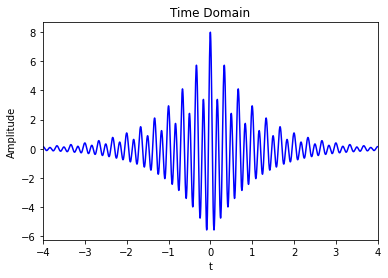

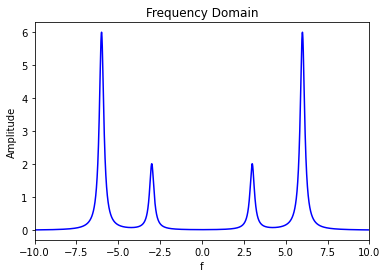

In [18]:
a = 1
b = 2
c = 6
f1 = 3
f2 = 6

#time domain
t = np.arange(-5,5,1/1000)
y_t = np.exp(-a*np.abs(t))*(b*np.cos(2*np.pi*f1*t) + c*np.cos(2*np.pi*f2*t))

plt.plot(t, y_t, 'b-')
plt.xlabel("t"), plt.ylabel("Amplitude")
plt.xlim([-4, 4])
plt.title('Time Domain')
plt.show()

#frequency domain
f = np.arange(-10,10,1/1000)
y_f = b/2*((2*a)/(a**2 + 4*(np.pi**2)*np.square(f-f1)) + (2*a)/(a**2 + 4*(np.pi**2)*np.square(f+f1))) + c/2*((2*a)/(a**2 + 4*(np.pi**2)*np.square(f-f2)) + (2*a)/(a**2 + 4*(np.pi**2)*np.square(f+f2)))

plt.plot(f, y_f, 'b-')
plt.xlabel("f"), plt.ylabel("Amplitude")
plt.xlim([-10, 10])
plt.title('Frequency Domain')
plt.show()

**(c) Plot y in time domain and frequency domain, where a = 0.5, b = 2, c= 6, f1 = 3, and f2 = 6**

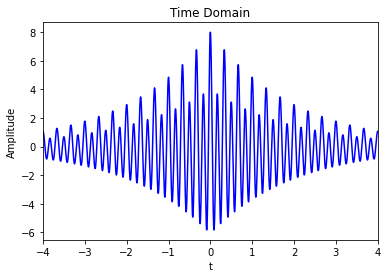

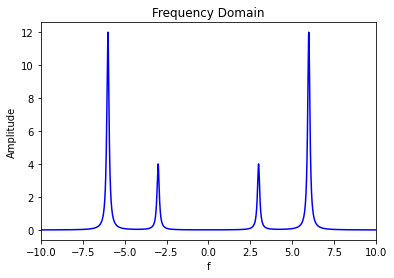

In [19]:
a = 0.5
b = 2
c = 6
f1 = 3
f2 = 6

#time domain
t = np.arange(-8,8,1/1000)
y_t = np.exp(-a*np.abs(t))*(b*np.cos(2*np.pi*f1*t) + c*np.cos(2*np.pi*f2*t))

plt.plot(t, y_t, 'b-')
plt.xlabel("t"), plt.ylabel("Amplitude")
plt.xlim([-4, 4])
plt.title('Time Domain')
plt.show()

#frequency domain
f = np.arange(-10,10,1/1000)
y_f = b/2*((2*a)/(a**2 + 4*(np.pi**2)*np.square(f-f1)) + (2*a)/(a**2 + 4*(np.pi**2)*np.square(f+f1))) + c/2*((2*a)/(a**2 + 4*(np.pi**2)*np.square(f-f2)) + (2*a)/(a**2 + 4*(np.pi**2)*np.square(f+f2)))

plt.plot(f, y_f, 'b-')
plt.xlabel("f"), plt.ylabel("Amplitude")
plt.xlim([-10, 10])
plt.title('Frequency Domain')
plt.show()

**(d) Compare the graphs in (b) and (c)**

The graphs in (b) and (c) have identical shapes, which is not too surprinsing since the only difference between the two signals is the 'a' variable, which had been doubled from a=0.5 in (b) to a=1 in (c). In the time domain, doubling *a* has caused the figure in (c) to contain a wider wave than the one from (b). Consequently, due to the inverse spreading property of the Fourier transform, the frequency domain graph in (c) has narrower peaks with has higher amplitudes compared to the corresponding graph in (b). 